<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

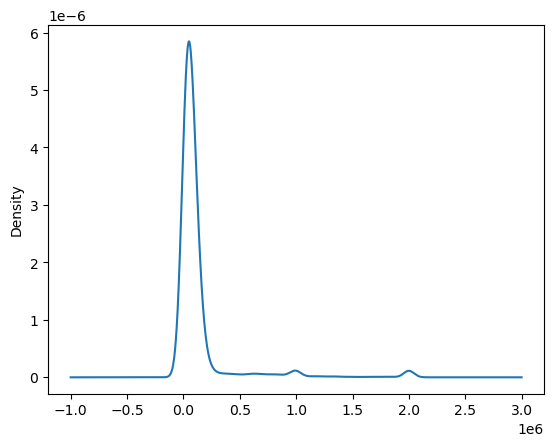

In [3]:
data = df["ConvertedComp"]
data.plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

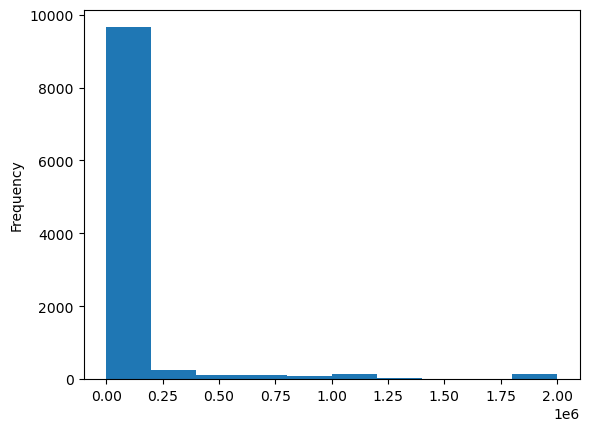

In [4]:
data.plot(kind='hist')

What is the median of the column `ConvertedComp`?


In [5]:
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
man_count = len(df[df["Gender"] == "Man"])
print("Number of respondents identifying as 'Man':", man_count)

Number of respondents identifying as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
median_woman_salary = df[df["Gender"] == "Woman"]["ConvertedComp"].median()
print("Median ConvertedComp for responders identified as 'Woman':", median_woman_salary)

Median ConvertedComp for responders identified as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
age_summary = df["Age"].describe(percentiles=[0.25, 0.5, 0.75])

# The age_summary variable will contain the five-number summary for the 'Age' column
# You can access the specific statistics as follows:
min_age = age_summary["min"]
q1_age = age_summary["25%"]
median_age = age_summary["50%"]
q3_age = age_summary["75%"]
max_age = age_summary["max"]

# Print the five-number summary
print("Minimum Age:", min_age)
print("1st Quartile (Q1):", q1_age)
print("Median (Q2):", median_age)
print("3rd Quartile (Q3):", q3_age)
print("Maximum Age:", max_age)


Minimum Age: 16.0
1st Quartile (Q1): 25.0
Median (Q2): 29.0
3rd Quartile (Q3): 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

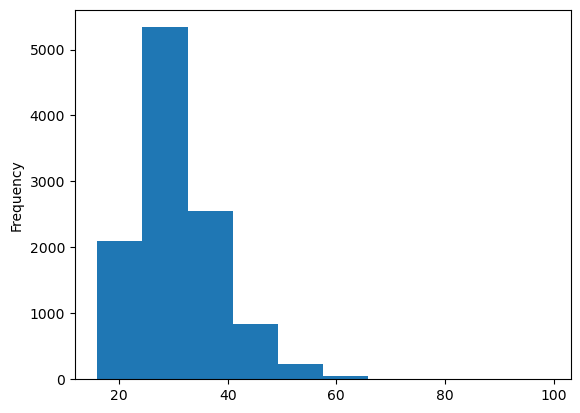

In [9]:
data = df["Age"]

data.plot(kind='hist')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

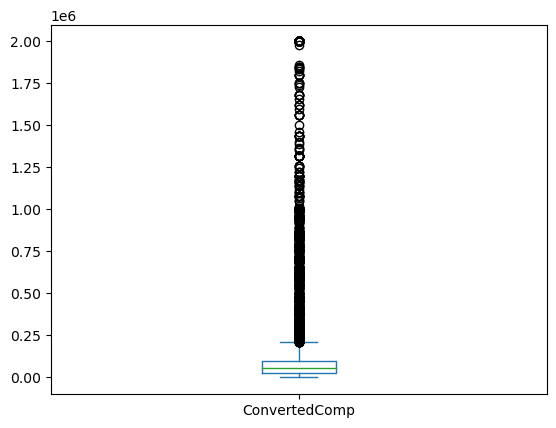

In [10]:
data = df["ConvertedComp"]
data.plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# Calculate the Interquartile Range (IQR)
iqr = data.quantile(0.75) - data.quantile(0.25)
print(iqr)

73132.0


Find out the upper and lower bounds.


In [12]:
# Calculate the lower bound
lower_bound = data.quantile(0.25) - 1.5 * iqr

# Calculate the upper bound
upper_bound = data.quantile(0.75) + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# Identify outliers by filtering data points below the lower bound or above the upper bound
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Print the number of outliers
print("Number of Outliers in ConvertedComp:", num_outliers)


Number of Outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
new_df = df[(df["ConvertedComp"] >= lower_bound) & (df["ConvertedComp"] <= upper_bound)]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
correlation = df.corr()['Age']
# The correlation variable will contain the correlation coefficients between 'Age' and other columns
print(correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
